https://programmers.co.kr/learn/courses/30/lessons/49189

## 문제 설명
n개의 노드가 있는 그래프가 있습니다. 각 노드는 1부터 n까지 번호가 적혀있습니다. 1번 노드에서 가장 멀리 떨어진 노드의 갯수를 구하려고 합니다. 가장 멀리 떨어진 노드란 최단경로로 이동했을 때 간선의 개수가 가장 많은 노드들을 의미합니다.

노드의 개수 n, 간선에 대한 정보가 담긴 2차원 배열 vertex가 매개변수로 주어질 때, 1번 노드로부터 가장 멀리 떨어진 노드가 몇 개인지를 return 하도록 solution 함수를 작성해주세요.

## 제한사항
- 노드의 개수 n은 2 이상 20,000 이하입니다.
- 간선은 양방향이며 총 1개 이상 50,000개 이하의 간선이 있습니다.
- vertex 배열 각 행 [a, b]는 a번 노드와 b번 노드 사이에 간선이 있다는 의미입니다.

In [25]:
n = 6
vertex = [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]
# 3

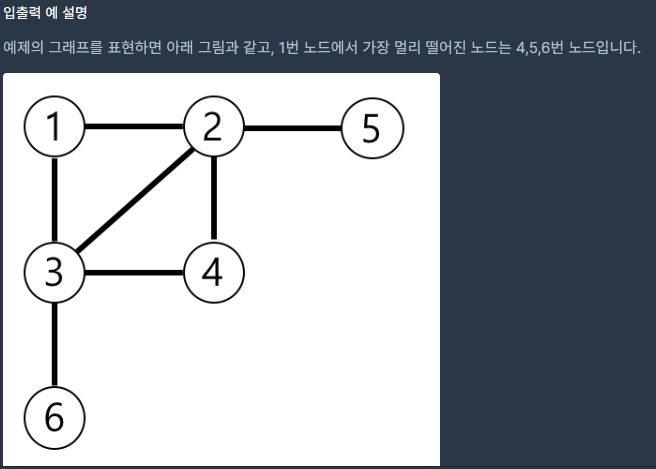

In [31]:
dist = [float('inf')] * (n+1)
dist[1] = 0 # 1번 노드에서 1번노드는 거리 0
adj = [[] for _ in range(n+1)]

In [32]:
for s, e in vertex:
    adj[s].append([1, e]) # [거리, 노드] # 모든 거리 1로 계산
    adj[e].append([1, s])

In [33]:
adj

[[],
 [[1, 3], [1, 2]],
 [[1, 3], [1, 1], [1, 4], [1, 5]],
 [[1, 6], [1, 4], [1, 2], [1, 1]],
 [[1, 3], [1, 2]],
 [[1, 2]],
 [[1, 3]]]

In [34]:
import heapq
def dijkstra(dist, adj):
    heap = []
    heapq.heappush(heap, [0,1]) # 거리, 노드 # 1이 출발노드
    
    while heap:
        cost, node = heapq.heappop(heap)
        for c, n in adj[node]:
            if cost + c < dist[n]:
                dist[n] = cost + c # 더 짧은 거리로 저장
                heapq.heappush(heap, [cost+c, n]) # 노드 추가

In [35]:
dijkstra(dist, adj)

In [36]:
dist

[inf, 0, 1, 1, 2, 2, 2]

In [14]:
for i, v in enumerate(dist):
    if v == float('inf'):
        dist[i] = -1
dist

[-1, 0, 1, 1, 2, 2, 2]

In [16]:
m = max(dist)

In [17]:
len([i for i in dist if i == m])

3

solution

In [ ]:
import heapq
def dijkstra(dist, adj):
    heap = []
    heapq.heappush(heap, [0,1]) # 거리, 노드 # 1이 출발노드
    
    while heap:
        cost, node = heapq.heappop(heap)
        for c, n in adj[node]:
            if cost + c < dist[n]:
                dist[n] = cost + c # 더 짧은 거리로 저장
                heapq.heappush(heap, [cost+c, n]) # 노드 추가
                
def solution(n, vertex):
    dist = [float('inf')] * (n+1)
    dist[1] = 0 # 1번 노드에서 1번노드는 거리 0
    adj = [[] for _ in range(n+1)]
    
    for s, e in vertex:
        adj[s].append([1, e]) # [거리, 노드] # 모든 거리 1로 계산
        adj[e].append([1, s])
        
    dijkstra(dist, adj)
    for i, v in enumerate(dist):
        if v == float('inf'):
            dist[i] = -1
    m = max(dist)
    
    return len([i for i in dist if i == m])